In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_excel ('Data Sample (AIC) для итоговой работы .xlsx')


# Информация  о датасете

Это транснациональный набор данных, который содержит все транзакции, совершенные в период с 01.12.2010 г. по 09.12.2011 г. для зарегистрированной в Великобритании розничной сети, не связанной с магазином. В основном компания продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

InvoiceNo: номер счета. Номинальное, 6-значное целое число, однозначно присвоенное каждой транзакции. Если этот код начинается с буквы «с», это означает отмену.

StockCode: код товара (товара). Номинальное, пятизначное целое число, однозначно присвоенное каждому отдельному продукту.

Description: Название товара (предмета). Номинальная.

Quantity: количество каждого продукта (товара) за транзакцию. Числовой.

InvoiceDate: Invice Дата и время. Числовой, день и время создания каждой транзакции.

UnitPrice: цена за единицу. Числовой, Цена товара за единицу в стерлингах.

CustomerID: номер клиента. Номинальное, пятизначное целое число, однозначно присвоенное каждому клиенту.

Country: Название страны. Номинальное, название страны, где проживает каждый клиент.

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null datetime64[ns]
UnitPrice      54214 non-null float64
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [5]:
#удалим нулевые значения
df2 = df.dropna()

In [6]:
print(np.shape(df2))

(40643, 8)


In [21]:
df2.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40643 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      40643 non-null object
StockCode      40643 non-null object
Description    40643 non-null object
Quantity       40643 non-null int64
InvoiceDate    40643 non-null datetime64[ns]
UnitPrice      40643 non-null float64
CustomerID     40643 non-null float64
Country        40643 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.8+ MB


Для того, чтобы определить, как цена товара влияет на количество проданных товаров, посчитаем коэффициент корреляции Пирсона.

Коэффициент корреляции Пирсона: -0.013069156290481105


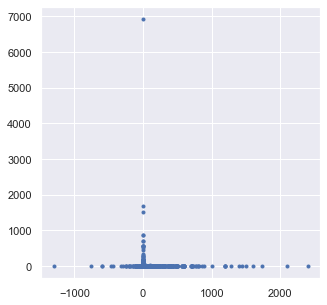

In [11]:
from scipy.stats import pearsonr

x = df2['Quantity']
y = df2['UnitPrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Чем коэффициент ближе к 0, тем более независимы переменные.

Итак, снижение цены товара практически не влияет на количество купленных товаров. Предлагаю отвергнуть выдвинутую гипотезу.